# Regresión lineal - modelo

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100,1)

In [3]:
y = 4  + 3 * X  + np.random.randn(100,1)

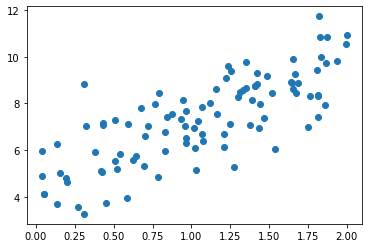

In [4]:
plt.scatter(X, y)

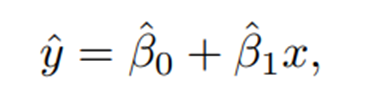

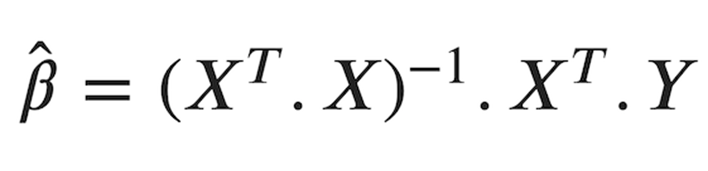

In [5]:
X_b  = np.c_[np.ones((100,1)),X]

In [6]:
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
beta

array([[4.56454394],
       [2.60836688]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.56454394] [[2.60836688]]


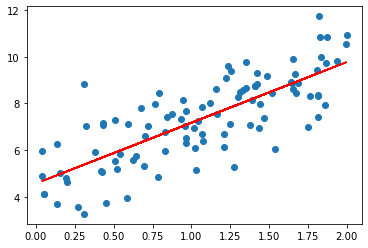

In [9]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), c="r")
plt.show()

# Actividad
Utiliza el dataset de "03CarPrice_Assignment.csv", y has la regresión lineal del modelo $price = f(enginesize)$

* Bonus: utiliza train_test_split
* Bonus: genera el data frame con las diferencias entre estimado y observado (para despues calcular el error)

In [10]:
datos = pd.read_csv("./data/03CarPrice_Assignment.csv")

In [11]:
datos = datos[["enginesize","price"]]

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   enginesize  205 non-null    int64  
 1   price       205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


<AxesSubplot:>

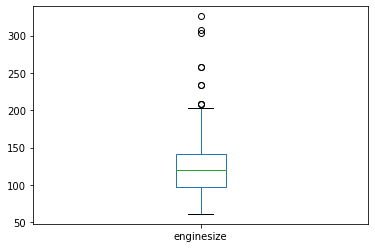

In [13]:
datos["enginesize"].plot.box()

<AxesSubplot:>

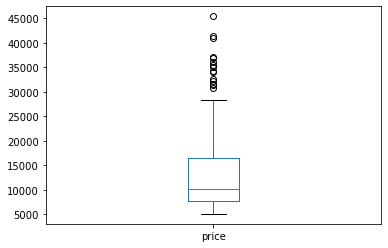

In [14]:
datos["price"].plot.box()

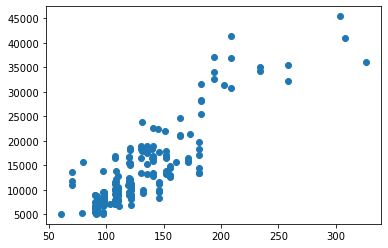

In [15]:
plt.scatter(datos["enginesize"], datos["price"])

In [16]:
# X = datos["enginesize"]

# datos[["enginesize"]]
# X.values.reshape(-1,1)

X = datos["enginesize"].values.reshape(-1,1)
y = datos["price"].values

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
regresion = LinearRegression()
regresion.fit(X_train, y_train)
regresion.score(X_test, y_test)

0.8536273423750257

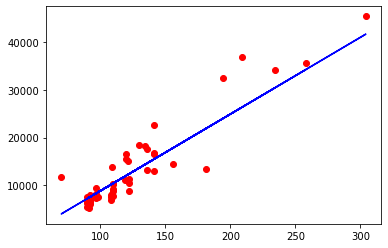

In [18]:
plt.scatter(X_test, y_test, c="r")
plt.plot(X_test, regresion.predict(X_test), c="b")
plt.show()

In [19]:
revisar = (
    pd.DataFrame({
        "valor_equis": [x[0] for x in X_test],
        "valores_Estimados": regresion.predict(X_test),
        "valores_observados": y_test
    })
)

In [20]:
revisar["error"] = revisar["valores_observados"] - revisar["valores_Estimados"]

$$\frac{suma cuadrada(y gorro - y observado)}{suma cuadrada(y observado-y promedio)}$$

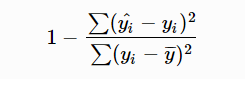

In [21]:
(
    1-(
        sum(np.power(revisar["error"],2))
        /
        sum(np.power(revisar["valores_observados"] - revisar["valores_observados"].mean(),2))
    )
)

0.8536273423750257

# Actividad

Utiliza el dataset "03diamonds.csv" para hacer una regresión lineal del tipo : $$price = f(carat)$$


In [22]:
datos = pd.read_csv("./data/03diamonds.csv", index_col=0)

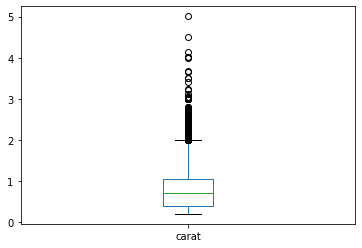

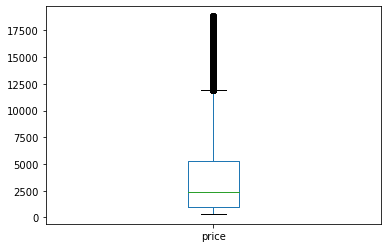

In [23]:
datos["carat"].plot.box()
plt.show()
datos["price"].plot.box()
plt.show()

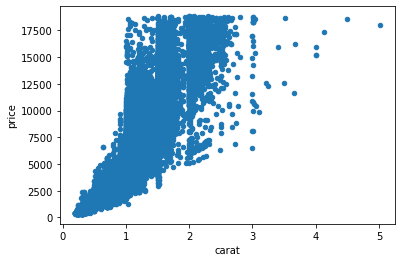

In [24]:
datos.plot(kind="scatter", x="carat", y="price")
plt.show()

In [25]:
X = datos[["carat"]]
y = datos["price"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
regresion = LinearRegression()
regresion.fit(X_train, y_train)
regresion.score(X_test, y_test)

0.8468913133048414

In [27]:
len(y_train) / len(datos)

0.75

In [28]:
len(y_test) / len(datos)

0.25

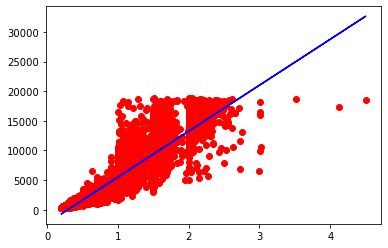

In [29]:
plt.scatter(X_test, y_test, c="r")
plt.plot(X_test,regresion.predict(X_test), c="b")
plt.show()

# Regresion multiple - Modelo

In [30]:
from sklearn.datasets import make_regression

In [31]:
X, y = make_regression(n_samples=100, n_features=2, random_state=5, noise=30)

In [32]:
(
    pd.DataFrame(X)
    .assign(y=y)
    .corr()
)

,0,1,y
0,1.000000,0.12994,0.342144
1,0.129940,1.00000,0.889520
y,0.342144,0.88952,1.000000


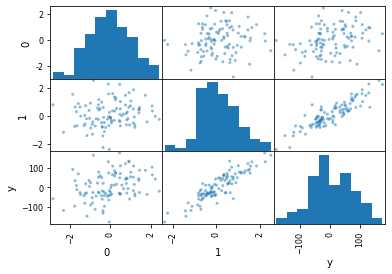

In [33]:
pd.plotting.scatter_matrix(
    pd.DataFrame(X)
    .assign(y=y)
)
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5) # partimos nuestros datos

regresion = LinearRegression() # instanciamos nuestro modelo

regresion.fit(X_train, y_train) # entrenamos nuestro modelo, con datos de entrenamiento

regresion.score(X_test, y_test) # evaluamos el rendimiento de nuestro modelo con datos de test

0.809978060262572

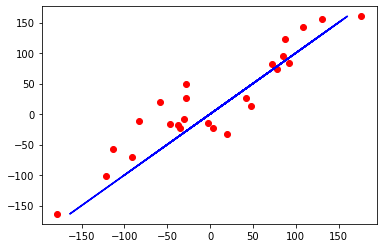

In [35]:
plt.scatter(y_test, regresion.predict(X_test), c="r")
plt.plot(regresion.predict(X_test), regresion.predict(X_test), c="b")

# Actividad

Con los datos de 03CarPrice_Assignment, realiza una regresión multiple para estimar el precio de los autos.

In [36]:
datos = pd.read_csv("./data/03CarPrice_Assignment.csv")

In [37]:
datos = datos[["price","carheight","enginesize"]]

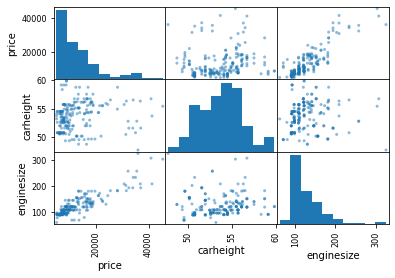

In [38]:
pd.plotting.scatter_matrix(
    datos
)
plt.show()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64


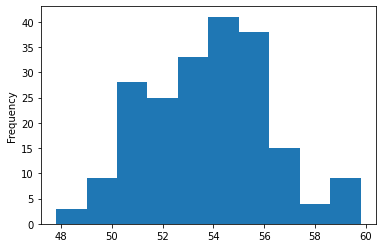

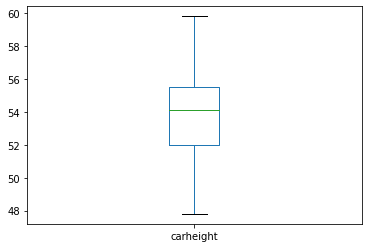

In [39]:
print(datos["carheight"].describe())
datos["carheight"].plot.hist()
plt.show()
datos["carheight"].plot.box()
plt.show()

In [40]:
X = datos[["carheight","enginesize"]]
y = datos["price"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5)

In [42]:
regresion = LinearRegression() 

In [43]:
regresion.fit(X_train, y_train)

LinearRegression()

In [44]:
regresion.score(X_test, y_test)

0.854731001041849

In [45]:
regresion.coef_

array([226.29033851, 160.28856751])

In [46]:
regresion.intercept_

-19275.13269496464

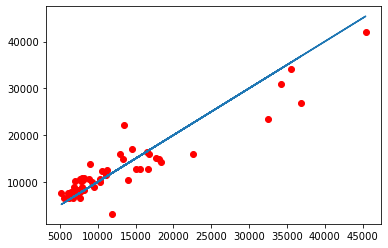

In [47]:
plt.scatter(y_test, regresion.predict(X_test), c="r")
plt.plot(y_test, y_test)
plt.show()

# Regresión polinomial - modelo

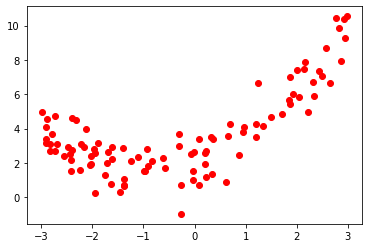

In [48]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y, c="r")


In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [51]:
# plt.scatter(X,y, c="r")
# plt.plot(X, lin_reg.predict(X_poly), c="b")
# plt.show()

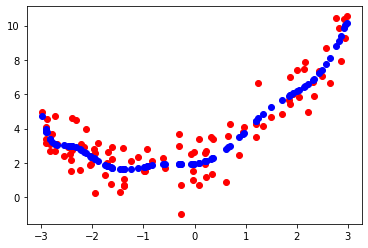

In [52]:
plt.scatter(X,y, c="r")
plt.scatter(X, lin_reg.predict(X_poly), c="b")
plt.show()

In [53]:
resultado = (
    pd.DataFrame(lin_reg.predict(X_poly))
    .rename(columns={0:"estimacion"})
    .assign(X=X)
    .sort_values(by="X")
)

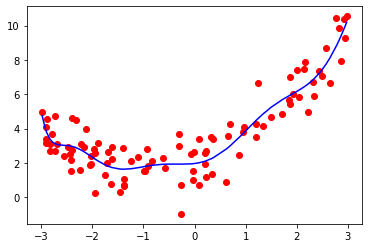

In [54]:
plt.scatter(X,y, c="r")
plt.plot(resultado["X"], resultado["estimacion"], c="b")
plt.show()


# Actividad - Diamantes
Dataset: 03diamonds.csv

Realiza la regresión polinomail de grado 2, para estimar el precio de 1 diamante en función de los kilates

In [55]:
datos = pd.read_csv("./data/03diamonds.csv", index_col=0)

<AxesSubplot:xlabel='carat', ylabel='price'>

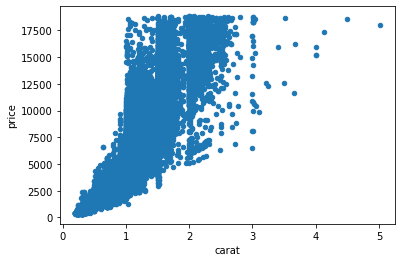

In [56]:
datos.plot(kind="scatter", x="carat",y="price")

In [57]:
X = datos[["carat"]]
y = datos["price"]

In [58]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [59]:
X_poly

array([[0.23      , 0.0529    , 0.012167  , 0.00279841],
       [0.21      , 0.0441    , 0.009261  , 0.00194481],
       [0.23      , 0.0529    , 0.012167  , 0.00279841],
       ...,
       [0.7       , 0.49      , 0.343     , 0.2401    ],
       [0.86      , 0.7396    , 0.636056  , 0.54700816],
       [0.75      , 0.5625    , 0.421875  , 0.31640625]])

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.score(X_poly, y)

0.8697960001044602

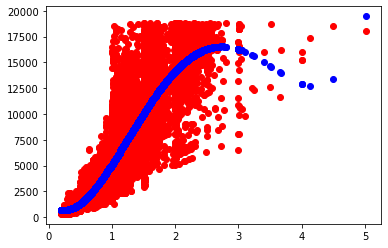

In [61]:
plt.scatter(X,y, c="r")
plt.scatter(X, lin_reg.predict(X_poly), c="b")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5)

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

print(lin_reg.score(poly_features.fit_transform(X_test), y_test))

plt.scatter(X_test,y_test, c="r")
plt.scatter(X_test, lin_reg.predict(poly_features.fit_transform(X_test)), c="b")
plt.show()



# Regresión logística

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

In [ ]:
iris["feature_names"]

In [ ]:
iris["data"]

In [ ]:
iris["target_names"]

In [ ]:
X = iris["data"][:,3:] # petal width

In [ ]:
y = (iris["target"]==2).astype(int) # Virginica

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)


In [ ]:
log_reg.score(X,y)

In [ ]:
log_reg.predict(X)

In [ ]:
log_reg.predict_proba(X)

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [ ]:
plt.plot(X_new, y_proba[:,1], c="g", label="Virginica")
plt.legend()
plt.xlabel("petal width")
plt.show()

# Actividad
Seguridad de autos

In [ ]:
datos = pd.read_csv("./data/03CarPrice_Assignment.csv")

In [ ]:
datos["symboling"].value_counts()

In [ ]:
datos["auto_seguro"] = datos["symboling"].isin([-2,-1,0]).astype(int)

In [ ]:
datos.plot(kind="scatter", x="wheelbase", y="auto_seguro")

In [ ]:
X = datos[["wheelbase"]]
y = datos["auto_seguro"]

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.score(X, y)

In [ ]:
datos[["wheelbase"]].describe()

In [ ]:
X_new = np.arange(min(datos["wheelbase"]), max(datos["wheelbase"])).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [ ]:
plt.plot(X_new, y_proba[:, 1])